In [1]:
from fastai.tabular.all import *

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)

In [3]:
df = pd.read_csv(path/'adult.csv')

print("Dataset Head:")
print(df.head())
print(f"\nDataset contains {df.shape}.")

Dataset Head:
   age          workclass  fnlwgt     education  education-num  \
0   49            Private  101320    Assoc-acdm           12.0   
1   44            Private  236746       Masters           14.0   
2   38            Private   96185       HS-grad            NaN   
3   38       Self-emp-inc  112847   Prof-school           15.0   
4   42   Self-emp-not-inc   82297       7th-8th            NaN   

        marital-status        occupation    relationship                 race  \
0   Married-civ-spouse               NaN            Wife                White   
1             Divorced   Exec-managerial   Not-in-family                White   
2             Divorced               NaN       Unmarried                Black   
3   Married-civ-spouse    Prof-specialty         Husband   Asian-Pac-Islander   
4   Married-civ-spouse     Other-service            Wife                Black   

       sex  capital-gain  capital-loss  hours-per-week  native-country salary  
0   Female            

In [4]:
procs = [Categorify, FillMissing, Normalize]

In [5]:
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
cont_names = ['age', 'fnlwgt', 'education-num']


In [6]:
y_names = 'salary'

In [7]:
to = TabularPandas(
    df,
    procs=procs,
    cat_names=cat_names,
    cont_names=cont_names,
    y_names=y_names,
    y_block=CategoryBlock(), # Specify that this is a classification task
    splits=RandomSplitter(valid_pct=0.2)(range_of(df))
)


/usr/local/lib/python3.12/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [8]:
dls = to.dataloaders(bs=64)

In [9]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,age,fnlwgt,education-num,salary
0,Self-emp-inc,Masters,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States,False,39.000000,202937.000363,14.0,>=50k
1,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,False,25.000000,117827.001374,10.0,<50k
2,Self-emp-not-inc,HS-grad,Married-civ-spouse,Sales,Wife,White,Female,United-States,False,36.000000,20332.999489,9.0,>=50k
3,Private,HS-grad,Never-married,Prof-specialty,Own-child,White,Male,United-States,False,25.000000,441209.998269,9.0,<50k
4,State-gov,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,False,23.000001,170091.000355,10.0,<50k
5,State-gov,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,United-States,False,23.000001,287988.001944,13.0,>=50k
6,Private,10th,Separated,Transport-moving,Own-child,White,Male,United-States,False,40.000000,254167.002079,6.0,<50k
7,Self-emp-not-inc,11th,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,False,33.000000,167476.000217,7.0,<50k
8,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Black,Male,United-States,False,44.000000,157249.000587,13.0,>=50k
9,Local-gov,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,False,47.000000,140644.001195,10.0,>=50k


In [16]:
leanr = tabular_learner(
    dls,
    metrics=accuracy,
    layers=[200, 100] # Sizes of the dense layers
)


Finding a learning rate...


SuggestedLRs(valley=0.0010000000474974513)

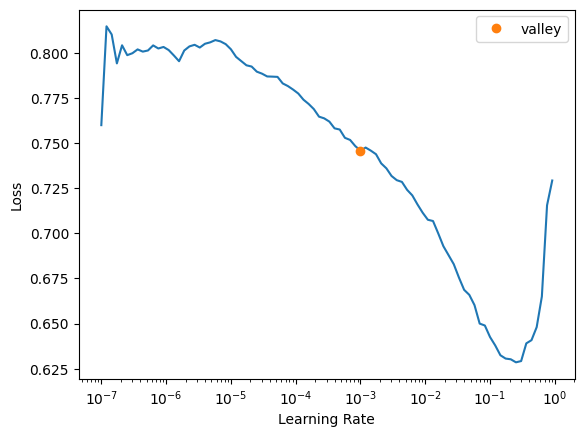

In [11]:
print("\nFinding a learning rate...")
leanr.lr_find()

In [17]:
print("\nTraining the model...")
leanr.fit_one_cycle(5, 1e-2)



Training the model...


epoch,train_loss,valid_loss,accuracy,time
0,0.378206,0.371145,0.825706,00:03
1,0.360005,0.354363,0.833999,00:04
2,0.358000,0.350918,0.837224,00:03
3,0.353939,0.346160,0.837531,00:03
4,0.348063,0.345133,0.840448,00:09


In [13]:
print("\nShowing some predictions on the validation set...")
leanr.show_results()



Showing some predictions on the validation set...


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,3.0,13.0,3.0,11.0,1.0,5.0,2.0,1.0,1.0,1.276729,0.734733,1.533296,1.0,1.0
1,5.0,9.0,5.0,4.0,2.0,5.0,2.0,40.0,1.0,0.250936,1.558966,0.357309,0.0,0.0
2,5.0,9.0,3.0,14.0,1.0,5.0,2.0,40.0,1.0,-0.335231,-1.456110,0.357309,0.0,1.0
3,5.0,1.0,5.0,9.0,2.0,5.0,2.0,27.0,1.0,-0.848127,1.209655,-1.602669,0.0,0.0
4,5.0,10.0,7.0,11.0,5.0,5.0,1.0,40.0,1.0,0.397478,-0.062716,1.141300,0.0,0.0
5,5.0,16.0,6.0,13.0,5.0,5.0,1.0,40.0,1.0,-0.921398,-0.759399,-0.034686,0.0,0.0
6,7.0,3.0,1.0,13.0,2.0,5.0,1.0,40.0,1.0,1.423271,0.201041,-0.818677,0.0,0.0
7,5.0,16.0,3.0,13.0,1.0,5.0,2.0,40.0,1.0,1.350000,-0.728601,-0.034686,1.0,1.0
8,1.0,16.0,1.0,1.0,2.0,5.0,1.0,40.0,1.0,1.569813,-0.618908,-0.034686,1.0,0.0



Plotting a confusion matrix...


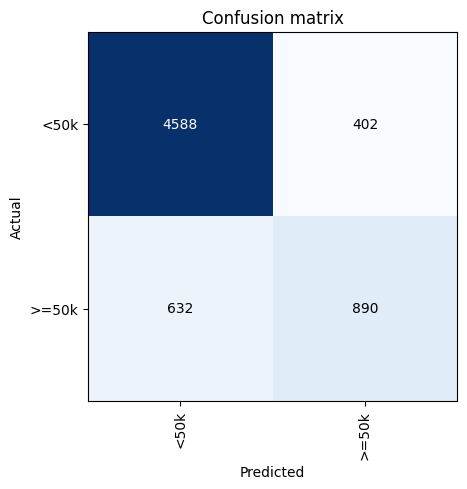

In [14]:
print("\nPlotting a confusion matrix...")
interp = ClassificationInterpretation.from_learner(leanr)
interp.plot_confusion_matrix()


In [18]:
print("\nExample prediction on a single row:")
test_row = df.iloc[[0]]

# Now 'leanr' is a TabularLearner, so .predict() will work
prediction = leanr.predict(test_row)

print(f"Input Data: \n{test_row}")
print(f"\nPredicted Salary Bracket: '{prediction[0]}'")


Example prediction on a single row:


AttributeError: 'DataFrame' object has no attribute 'to_frame'